Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
First label: 5


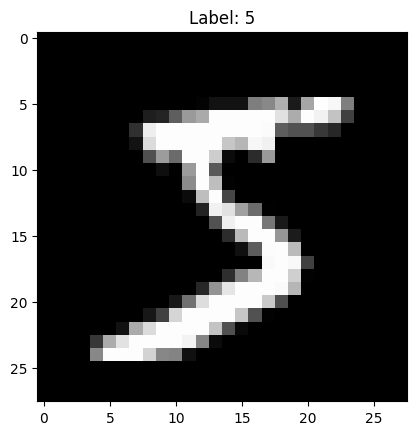

255
0


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Explore the data
print("Training images shape:", train_images.shape)  # Should be (60000, 28, 28)
print("Training labels shape:", train_labels.shape)  # Should be (60000,)
print("First label:", train_labels[0])

# Visualize one image
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

# YOUR TASKS:
# 1. How many training images are there?
# 2. What is the size of each image? (height x width)
# 3. Display 5 different images with their labels
# 4. What are the pixel values? (print min and max of train_images[0])


####answers
###1)there are 60000 images
###20the size of each image is 28x28
#### just by changing the number of train_image and label number we can display
#different images

####printing minimum and maximum of images
print(train_images.max())
print(train_images.min())

In [ ]:
# Normalize pixel values to 0-1 range
train_images = train_images / 255.0
test_images = test_images / 255.0

print("After normalization:")
print("Min value:", train_images.min())
print("Max value:", train_images.max())

# YOUR TASKS:
# 1. Why do we normalize? (Write your understanding in a comment)
# 2. What would happen if we didn't normalize?
# 3. Print the shape of train_images again - did it change?


############anwswerss##
#1)i think we normalize because , normalizing in the range of 0-1 , would make it easy to understand
#rather than working with bigger values , make the learning of it easy and understandable
#while training the model , maybe making it efficient as it reduces large amounts processing time

##2)it would make the working with larger pixel values hard , and inefficient
#and that not beneficial when working to train and a model that requires a big number
#of images to train

##3)No! it didnt change.

After normalization:
Min value: 0.0
Max value: 0.00392156862745098


In [ ]:
#i wrote this code by learning it , not copy-pasted

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(10,activation = "softmax")
])

model.summary()



#####ANWERSSSS###
#1)what does flatten do ?
#ans:the flatten layer converts the multidimentional input or vector we are working with
#into single dimentional vector, like flatten it!

#2) the dense layer means that it includes neurons , that are interconnected
#in every layer , so like it gets the input, applies the activation
#function and give the sum of input to every neuron

#3)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(10,activation = "softmax")
])

model.summary()


#when we reduce the number of neurons from 128 to 64 in dense layer
#the number of output shape in that layer and the number of parameters are reduced
#to half like previously it was 101,770 , but now they are 50,240...also
#i have noticed that the size in kbs is reduced



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

why 10 neurons in output layer ?
the neurons in output layer depends upon the number of classes in the model, mainly there are as many neurons in output layer as there are classes.there could be any number of neurons in this layer, depending upon the type of model.
there are currently 1029  in model with 128 neurons and 100,420 parameters, and 650 in model with 64 neurons and 50,240 parameters.


#the purpose of RELU and Softmax

ReLU:

Purpose: Used in hidden layers to introduce non-linearity, allowing the network to learn complex patterns.



Softmax:

Purpose: Used in the output layer to convert raw scores into probability distributions, ensuring that the sum of all probabilities equals 1.

Both functions are crucial for the proper functioning of neural networks, and their choice should be based on the specific requirements of the task at hand

In [ ]:
# Configure the model for training
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    validation_split=0.2
)

# YOUR TASKS:
# 1. What does 'optimizer' do?
# 2. What does 'loss' measure?
# 3. What does epochs=5 mean?
# 4. Watch the training - does accuracy improve each epoch?
# 5. What's the difference between training accuracy and validation accuracy?

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7501 - loss: 10.4896 - val_accuracy: 0.8517 - val_loss: 0.7147
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8629 - loss: 0.5870 - val_accuracy: 0.8827 - val_loss: 0.4994
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8959 - loss: 0.4354 - val_accuracy: 0.9097 - val_loss: 0.3756
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9165 - loss: 0.3461 - val_accuracy: 0.9192 - val_loss: 0.3369
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9242 - loss: 0.3040 - val_accuracy: 0.9283 - val_loss: 0.2855


the optimizer is the algorithm that updates the model’s weights during training to minimize the loss function.

What the optimizer does;;


Looks at the loss (error) after each batch/epoch.
Computes gradients, how much each weight in the network should change to reduce the loss.
Updates the weights using those gradients according to its specific update rule.


Without an optimizer, the model’s weights would never change, and the network would never learn from the data

loss measure thhat how far models predicttions are from real labels.

Lower loss means the model’s predictions are closer to the true labels



#ANSWER NO 3
An epoch is one complete pass through the entire training dataset.
epochs=5 means:
The model will go through the whole training set 5 times.
After each epoch, weights are updated and accuracy/loss are reported



#ANSWER4
yes it does , the lower loss means the accuracy is increasing.



#anwer5
Training accuracy: Accuracy on the data the model is learning from.
Validation accuracy: Accuracy on unseen data

In [ ]:
# Test on unseen data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_accuracy:.4f}")

# Make predictions
predictions = model.predict(test_images[:5])
print("Predictions shape:", predictions.shape)
print("First prediction:", predictions[0])
print("Predicted digit:", np.argmax(predictions[0]))
print("Actual digit:", test_labels[0])

# YOUR TASKS:
# 1. What accuracy did you get on test data?
# 2. What does the prediction array contain? (10 numbers - what do they mean?)
# 3. Make predictions on 10 images and show which ones were wrong
# 4. Why might some predictions be wrong?


#1)i got accuracy of 90 percent
#2)the prediction array the first timr predicted data


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9175 - loss: 0.3366

Test accuracy: 0.9262
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predictions shape: (5, 10)
First prediction: [0.0000000e+00 1.4998597e-10 2.0007471e-06 1.3088925e-06 2.0131301e-10
 1.1239256e-33 1.2272029e-25 9.9999642e-01 5.8388611e-12 2.8932334e-07]
Predicted digit: 7
Actual digit: 7


In [ ]:
#task 3 , 10 predictions and find wrong ones

predictions = model.predict(test_images[:10])  ####i wrote tehm myself
print("checking predictions")
#1
predicted = np.argmax(predictions[1])
actual = test_labels[1]
print(f"predicted:{predicted}")
print(f"actual:{actual}")

#2
predicted2 = np.argmax(predictions[2])
actual2 = test_labels[2]
print(f"predicted:{predicted2}")
print(f"actual:{actual2}")

#3
predicted3 = np.argmax(predictions[3])
actual3= test_labels[3]
print(f"predicted:{predicted3}")
print(f"actual:{actual3}")

#4
predicted4 = np.argmax(predictions[4])
actual4 = test_labels[4]
print(f"predicted:{predicted4}")
print(f"actual:{actual4}")

#5
predicted5 = np.argmax(predictions[5])
actual5 = test_labels[5]
print(f"predicted:{predicted5}")
print(f"actual:{actual5}")

#6
predicted6 = np.argmax(predictions[6])
actual6 = test_labels[6]
print(f"predicted:{predicted6}")
print(f"actual:{actual6}")

#7
predicted7 = np.argmax(predictions[7])
actual7 = test_labels[7]
print(f"predicted:{predicted7}")
print(f"actual:{actual7}")

#8
predicted8 = np.argmax(predictions[8])
actual8 = test_labels[8]
print(f"predicted:{predicted8}")
print(f"actual:{actual8}")

#9
predicted9 = np.argmax(predictions[9])
actual9 = test_labels[9]
print(f"predicted:{predicted9}")
print(f"actual:{actual9}")

#10
predicted0 = np.argmax(predictions[0])
actual0 = test_labels[0]
print(f"predicted:{predicted0}")
print(f"actual:{actual0}")


#only the 8th prediction was wrong
#it was 6 instead of 5

#all other were correct



##task4) Predictions in machine learning models can be wrong due to
#several reasons, including data quality issues, model overfitting,
#and poor evaluation methods

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
checking predictions
predicted:2
actual:2
predicted:1
actual:1
predicted:0
actual:0
predicted:4
actual:4
predicted:1
actual:1
predicted:4
actual:4
predicted:9
actual:9
predicted:6
actual:5
predicted:9
actual:9
predicted:7
actual:7
